In [97]:
import pandas_datareader.data as web
import os
from dotenv import load_dotenv
import pandas as pd

In [98]:
BASEDIR = os.path.join(os.getcwd(), '..')
load_dotenv(os.path.join(BASEDIR, '.env'))

start_date = '2016-04-04'
end_date = '2019-04-04'
name = 'AAPL'

df = web.DataReader(name=name, data_source='quandl', start=start_date, end=end_date, access_key=os.getenv("quandle_key"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: the 'access_key' keyword is deprecated, use 'api_key' instead
  


In [99]:
# Graphing the data
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x_vals, y_vals):
    plt.figure(figsize=(20, 20))
    plt.plot(df.index, df['mid_data'])

In [100]:
df['mid_data'] = (df['High']+df['Low'])/2
# plot(df.index, df['mid_data'])

In [106]:
# Data preprocessing
from sklearn.preprocessing import MinMaxScaler 
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np

class preprocess_data:
    def __init__(self, y, timesteps, num_predict):
        self.timesteps = timesteps
        self.num_predict= num_predict
        self.scaler = MinMaxScaler(feature_range=(-1, 1))
        self.data = self.scaler.fit_transform(y.reshape(-1, 1))
        self.x, self.y = self.reformat_data()
        
    def reformat_data(self):
        batch = TimeseriesGenerator(self.data, self.data, length=self.timesteps, batch_size=len(self.data)).__iter__().__next__()
        return batch[0][:1 - self.num_predict], self.extend_y(batch[1]).reshape((-1, self.num_predict))
        
    def extend_y(self, y_batch):
        test = np.array(
            [y_batch[i:i + self.num_predict] for i in range(len(y_batch[:1 - self.num_predict]))])
        if len(y_batch[:1 - self.num_predict]) == 0:
            return 0
        return test

In [117]:
timesteps = 100
num_predict = 5

data = preprocess_data(df['mid_data'].values[::-1], timesteps, num_predict)

In [118]:
data.y.shape

(394, 5)

In [119]:
# Imports
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM
from keras.optimizers import Adam

class lstm:
    def __init__(self, data, timesteps, num_predict, dropout=0.2, val_split=0.2, num_neurons=5, epochs=5):
        self.data = data
        self.timesteps = timesteps
        self.num_predict = num_predict
        self.dropout = dropout
        self.val_split = val_split
        self.num_neurons = num_neurons
        self.epochs = epochs
        
        # Defining the model
        self.model = Sequential()
        self.model.add(LSTM(self.num_neurons, input_shape=(self.timesteps, 1,), return_sequences=False))
        self.model.add(Dropout(rate=self.dropout))
        self.model.add(Dense(self.num_predict))
        
        adam = Adam(clipnorm=1)
        self.model.compile(optimizer=adam, loss='mean_squared_error')
        
    def train(self):
        try:
            self.history = self.model.fit(self.data.x, self.data.y, epochs = self.epochs, validation_split=self.val_split, shuffle=True)
            return True
        except:
            return False
        
    def predict(self, predict_data):
        try:
            self.model_out = self.model.predict(predict_data)
            return self.model_out
        except:
            return None
        
    def save_model(self):
        pass
    
    def load_model(self):
        pass
        

In [120]:
lstm_model = lstm(data, timesteps=100, num_neurons=10, num_predict=5, epochs=100)

In [121]:
lstm_model.train()

Train on 315 samples, validate on 79 samples
Epoch 1/100
315/315 [==============================] - 1s 2ms/step - loss: 0.1366 - val_loss: 0.4088
Epoch 2/100
315/315 [==============================] - 0s 626us/step - loss: 0.1193 - val_loss: 0.3450
Epoch 3/100
315/315 [==============================] - 0s 639us/step - loss: 0.0977 - val_loss: 0.2805
Epoch 4/100
315/315 [==============================] - 0s 667us/step - loss: 0.0793 - val_loss: 0.2157
Epoch 5/100
315/315 [==============================] - 0s 668us/step - loss: 0.0640 - val_loss: 0.1556
Epoch 6/100
315/315 [==============================] - 0s 647us/step - loss: 0.0468 - val_loss: 0.1031
Epoch 7/100
315/315 [==============================] - 0s 647us/step - loss: 0.0398 - val_loss: 0.0739
Epoch 8/100
315/315 [==============================] - 0s 649us/step - loss: 0.0322 - val_loss: 0.0615
Epoch 9/100
315/315 [==============================] - 0s 682us/step - loss: 0.0333 - val_loss: 0.0602
Epoch 10/100
315/315 [========

Epoch 80/100
315/315 [==============================] - 0s 690us/step - loss: 0.0135 - val_loss: 0.0146
Epoch 81/100
315/315 [==============================] - 0s 680us/step - loss: 0.0139 - val_loss: 0.0152
Epoch 82/100
315/315 [==============================] - 0s 679us/step - loss: 0.0116 - val_loss: 0.0151
Epoch 83/100
315/315 [==============================] - 0s 680us/step - loss: 0.0125 - val_loss: 0.0154
Epoch 84/100
315/315 [==============================] - 0s 719us/step - loss: 0.0138 - val_loss: 0.0144
Epoch 85/100
315/315 [==============================] - 0s 750us/step - loss: 0.0124 - val_loss: 0.0154
Epoch 86/100
315/315 [==============================] - 0s 785us/step - loss: 0.0120 - val_loss: 0.0153
Epoch 87/100
315/315 [==============================] - 0s 827us/step - loss: 0.0121 - val_loss: 0.0144
Epoch 88/100
315/315 [==============================] - 0s 783us/step - loss: 0.0107 - val_loss: 0.0145
Epoch 89/100
315/315 [==============================] - 0s 748us

True

In [123]:
len(df['mid_data'])

498

In [124]:
pred_y.shape

(394, 5)

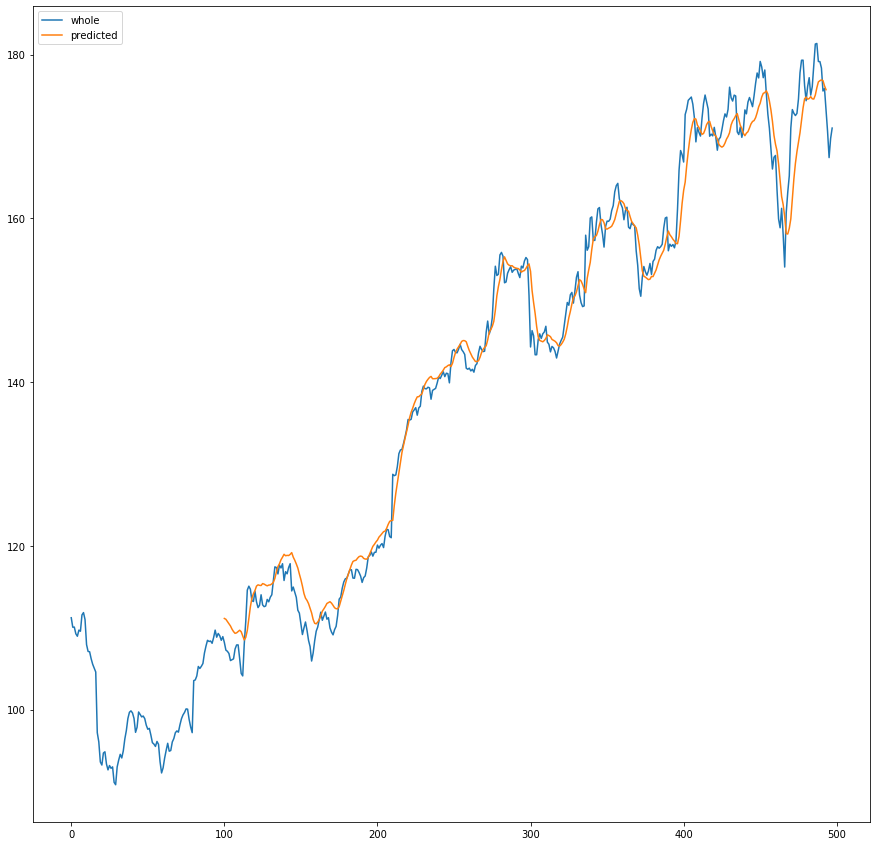

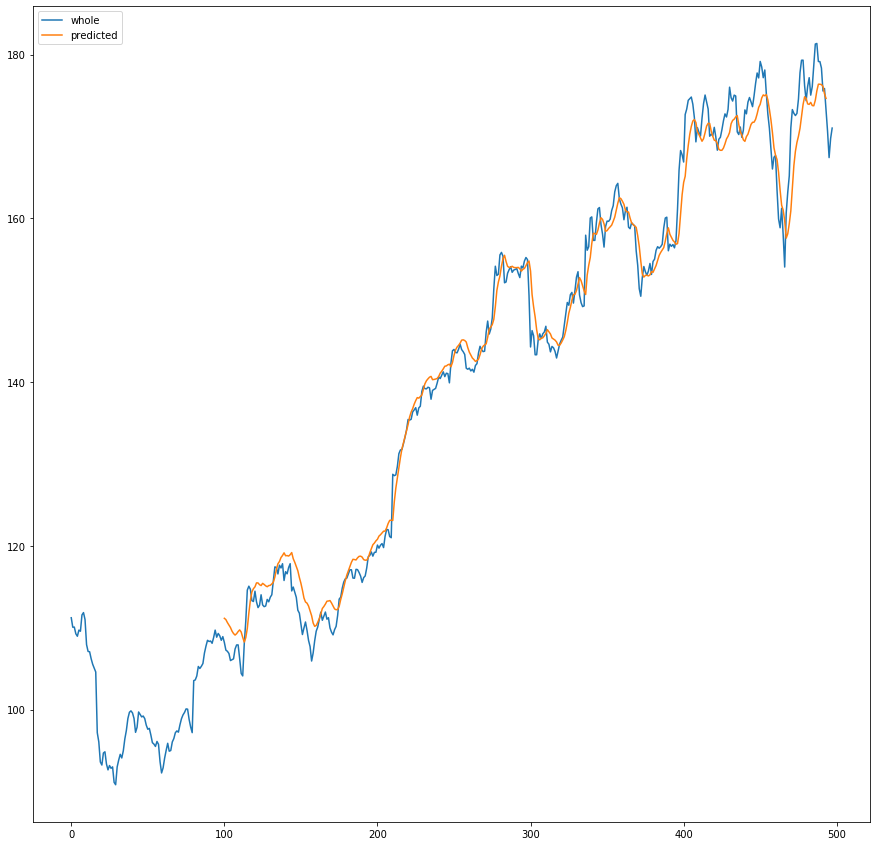

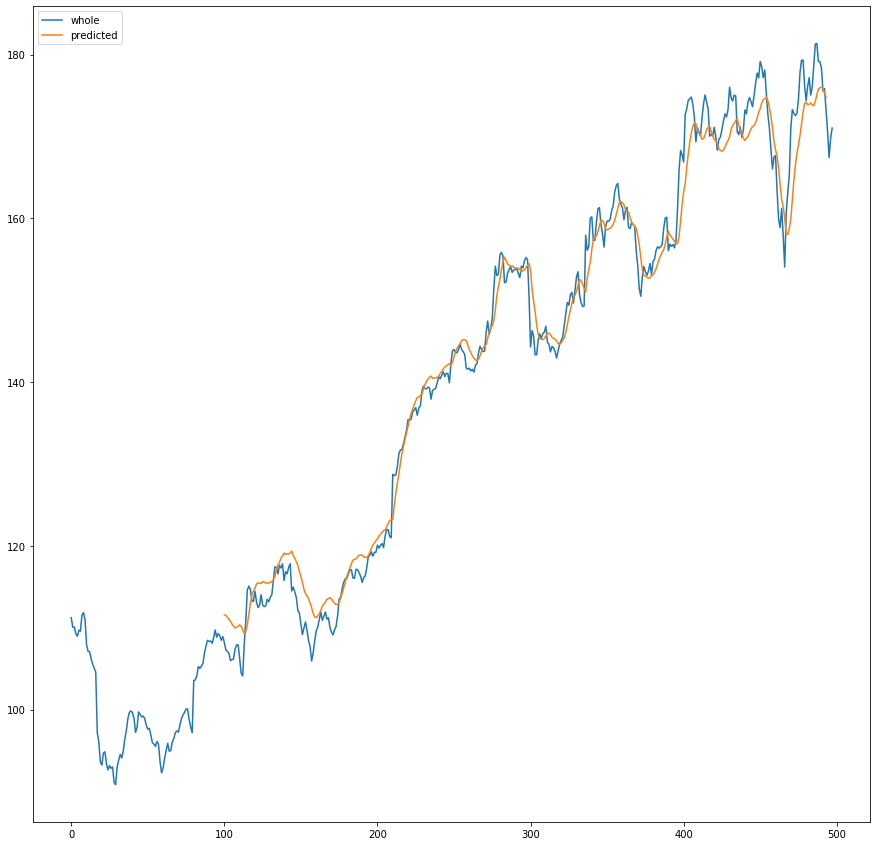

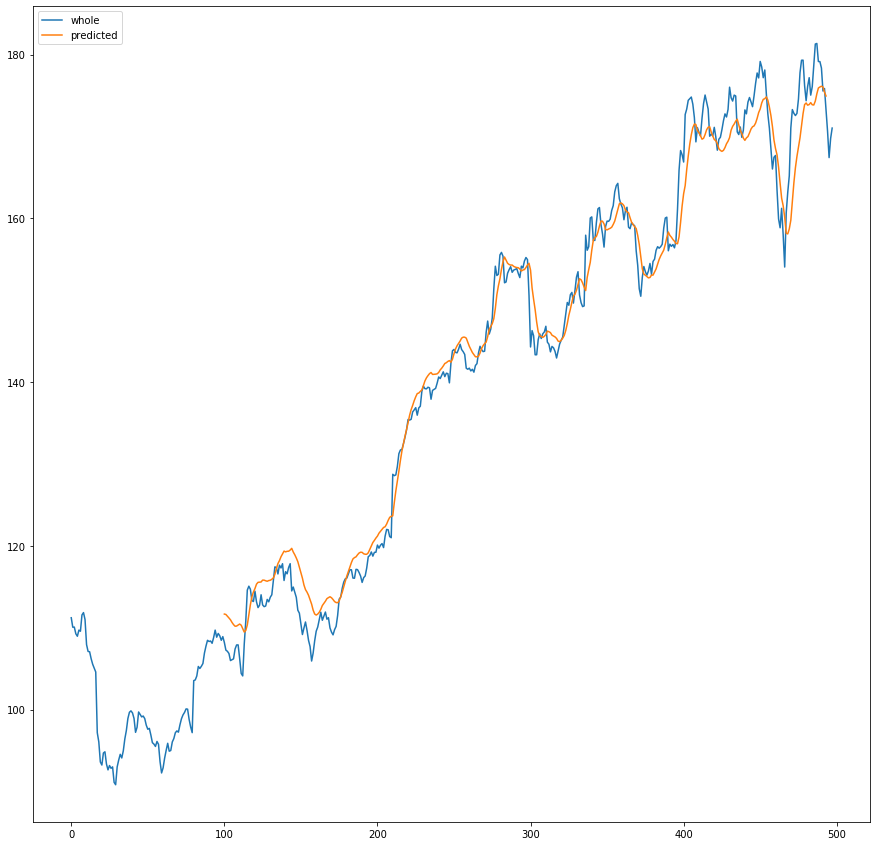

In [122]:
pred_vals = lstm_model.predict(data.x)

# Visualization
val_y = pd.DataFrame(data.scaler.inverse_transform(data.y))
pred_y = pd.DataFrame(data.scaler.inverse_transform(pred_vals))

# plot(df.index, df['mid_data'])
for i in range(4):
    plt.figure(figsize=(15,15))
    plt.plot(df['mid_data'].values[::-1], label='whole')
#     plt.plot((val_y.index.values+100) ,val_y.iloc[:, i], label='actual')
    plt.plot((val_y.index.values+100), (pred_y.iloc[:, i].values), label='predicted')
    plt.legend()

    plt.show()